In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv('spam.csv',encoding='latin')

In [3]:
(rows,cols) = df.shape
print("Rows:",rows)
print("Columns:",cols)

Rows: 5572
Columns: 5


# CHECKING FOR NULL VALUES

In [4]:
df[df['Unnamed: 2'].notna()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5372,ham,"Ok., is any problem to u frm him? Wats matter?",NaN,NaN,NaN
2871,ham,See you there!,NaN,NaN,NaN
3529,ham,Tyler (getting an 8th) has to leave not long a...,NaN,NaN,NaN
614,ham,I called and said all to him:)then he have to ...,NaN,NaN,NaN
5244,ham,thanks for the temales it was wonderful. Thank...,NaN,NaN,NaN


In [6]:
df['Unnamed: 2'].notnull().sum()

50

In [7]:
df['Unnamed: 3'].notnull().sum()

12

In [8]:
df['Unnamed: 4'].notnull().sum()

6

In [9]:
# Dropping the Unnamed:2 , Unnamed:3 and Unnamed:4 columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)


In [10]:
df.sample(5)

,v1,v2
5132,ham,it's still not working. And this time i also t...
1449,ham,say thanks2.
40,ham,Pls go ahead with watts. I just wanted to be s...
4068,ham,Hope youåÕre not having too much fun without m...
2412,spam,I don't know u and u don't know me. Send CHAT ...


In [11]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [12]:
df = df.dropna()

# CHECKING FOR DUPLICATE ROWS

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
# RENAMING COLUMNS
df = df.rename(columns = {'v1':'output','v2':'text'})

In [17]:
df.head()

,output,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# LABEL ENCODING
unique = df['output'].unique()
unique

array(['ham', 'spam'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['output'] = encoder.fit_transform(df['output'])
df.head()

,output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df = df.reset_index(drop=True)
new_df = df.copy()
new_df

,output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...
5165,0,Will Ì_ b going to esplanade fr home?
5166,0,"Pity, * was in mood for that. So...any other s..."
5167,0,The guy did some bitching but I acted like i'd...


# ANALYSIS

### HAM VS SPAM

([<matplotlib.patches.Wedge at 0x1d49993f820>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

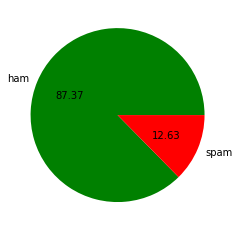

In [21]:
hams = new_df[new_df['output']==0].shape[0]

fig = plt.figure()
plt.pie([hams,new_df.shape[0]-hams], labels = ['ham','spam'],colors=['green','red'],autopct="%0.2f")

# THERE IS DATA IMBALANCE

### SPECIAL CHARACTERS

In [22]:
from string import punctuation
punctuation = set(punctuation)

In [23]:
punctuation

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [24]:
errors = []
special_chars = []
for i in range(len(new_df['text'])):
    ans = 0
    try:
        for j in new_df['text'][i]:
            if j in punctuation:
                ans = ans+1
    except:
        errors.append(i) 
    special_chars.append(ans)

new_df['special_chars'] = special_chars
print(errors)

[]


In [25]:
print(new_df.iloc[[102]]['text'])

102    wow. You're right! I didn't mean to do that. I...
Name: text, dtype: object


<AxesSubplot: xlabel='special_chars', ylabel='Count'>

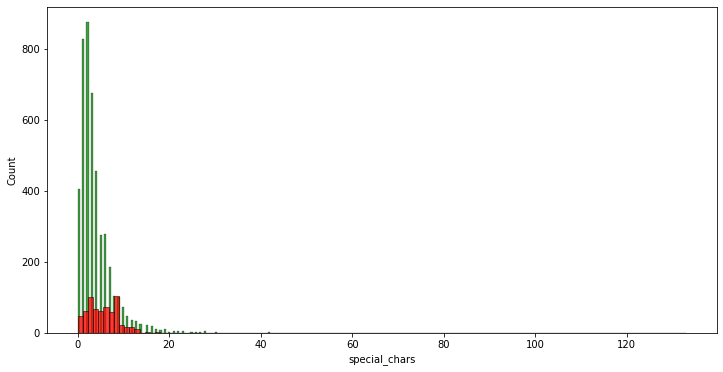

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(new_df[new_df['output'] == 0]['special_chars'],color='green')
sns.histplot(new_df[new_df['output'] == 1]['special_chars'],color='red')

In [27]:
# REMOVING ALL SPECIAL CHARACTERS
import re
for i in range(len(new_df)):
    new_df['text'][i] = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", new_df['text'][i])

<ipython-input-27-8183dbd46774>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text'][i] = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", new_df['text'][i])


In [28]:
new_df['text'][0]

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

### DIGITS

In [29]:
digits = []
for i in range(len(new_df['text'])):
    ans = 0
    for j in new_df['text'][i]:        
        if j in ['1','2','3','4','5','6','7','8','9','0']:
            ans = ans+1
    digits.append(ans)
    
new_df['digits'] = digits

<AxesSubplot: xlabel='digits', ylabel='Count'>

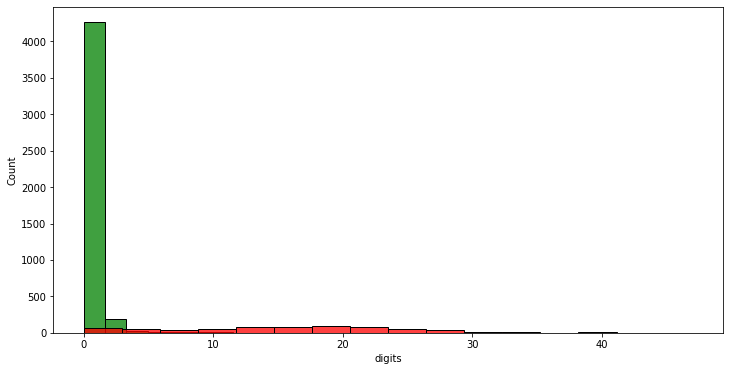

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(new_df[new_df['output'] == 0]['digits'],color='green')
sns.histplot(new_df[new_df['output'] == 1]['digits'],color='red')

In [31]:
# REMOVING ALL THE DIGITS
import re
for i in range(len(new_df['text'])):
    new_df['text'][i] = re.sub('[0-9]',"",new_df['text'][i])
new_df

<ipython-input-31-b1e0ea43aeeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text'][i] = re.sub('[0-9]',"",new_df['text'][i])


,output,text,special_chars,digits
0,0,Go until jurong point crazy Available only in ...,9,0
1,0,Ok lar Joking wif u oni,6,0
2,1,Free entry in a wkly comp to win FA Cup final...,6,25
3,0,U dun say so early hor U c already then say,6,0
4,0,Nah I don't think he goes to usf he lives arou...,2,0
...,...,...,...,...
5164,1,This is the nd time we have tried contact u U...,8,21
5165,0,Will Ì_ b going to esplanade fr home,2,0
5166,0,Pity * was in mood for that Soany other sugges...,7,0
5167,0,The guy did some bitching but I acted like i'd...,1,0


### CHARACTERS

In [32]:
chars = []
for i in range(len(new_df['text'])):
    chars.append(len(new_df['text'][i]))
    
new_df['characters'] = chars

<AxesSubplot: xlabel='characters', ylabel='Count'>

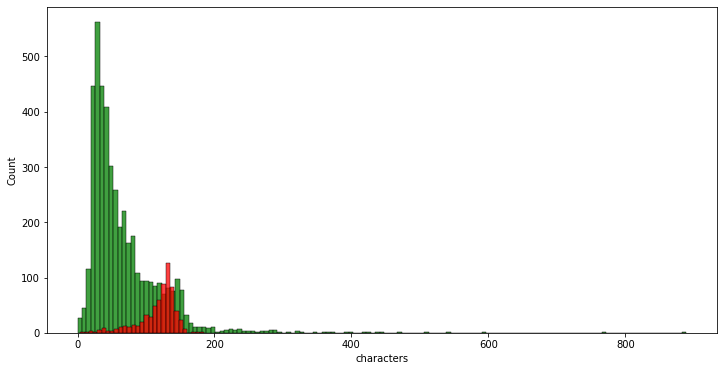

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(new_df[new_df['output'] == 0]['characters'],color='green')
sns.histplot(new_df[new_df['output'] == 1]['characters'],color='red')

### SENTENCES AND WORDS

In [34]:
#number of sentences 
new_df['num_sent'] = new_df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
new_df['num_words'] = new_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
new_df

,output,text,special_chars,digits,characters,num_sent,num_words
0,0,Go until jurong point crazy Available only in ...,9,0,102,1,20
1,0,Ok lar Joking wif u oni,6,0,23,1,6
2,1,Free entry in a wkly comp to win FA Cup final...,6,25,127,1,29
3,0,U dun say so early hor U c already then say,6,0,43,1,11
4,0,Nah I don't think he goes to usf he lives arou...,2,0,60,1,14
...,...,...,...,...,...,...,...
5164,1,This is the nd time we have tried contact u U...,8,21,132,1,27
5165,0,Will Ì_ b going to esplanade fr home,2,0,36,1,8
5166,0,Pity * was in mood for that Soany other sugges...,7,0,51,1,10
5167,0,The guy did some bitching but I acted like i'd...,1,0,125,1,27


In [36]:
new_df[['special_chars','digits','characters','num_sent','num_words']].describe()

,special_chars,digits,characters,num_sent,num_words
count,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000
mean,4.091120,2.205069,73.312246,0.999420,15.373767
std,4.444055,6.025241,54.082901,0.024086,11.170071
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,34.000000,1.000000,7.000000
50%,3.000000,0.000000,57.000000,1.000000,12.000000
75%,6.000000,1.000000,108.000000,1.000000,22.000000
max,133.000000,47.000000,889.000000,1.000000,173.000000


In [37]:
new_df[new_df['output']==0][['special_chars','digits','characters','num_sent','num_words']].describe()

,special_chars,digits,characters,num_sent,num_words
count,4516.00000,4516.000000,4516.000000,4516.000000,4516.000000
mean,3.86581,0.290301,66.934012,0.999336,14.403454
std,4.52126,1.011825,54.010094,0.025768,11.415799
min,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,0.000000,32.000000,1.000000,7.000000
50%,3.00000,0.000000,50.000000,1.000000,11.000000
75%,5.00000,0.000000,86.000000,1.000000,19.000000
max,133.00000,23.000000,889.000000,1.000000,173.000000


In [38]:
new_df[new_df['output']==1][['special_chars','digits','characters','num_sent','num_words']].describe()

,special_chars,digits,characters,num_sent,num_words
count,653.000000,653.000000,653.000000,653.0,653.000000
mean,5.649311,15.447167,117.422665,1.0,22.084227
std,3.493353,8.924653,27.449098,0.0,5.908345
min,0.000000,0.000000,4.000000,1.0,1.000000
25%,3.000000,9.000000,107.000000,1.0,20.000000
50%,5.000000,16.000000,125.000000,1.0,23.000000
75%,8.000000,22.000000,135.000000,1.0,26.000000
max,26.000000,47.000000,185.000000,1.0,39.000000


# FINDING CORRELATION

<AxesSubplot: >

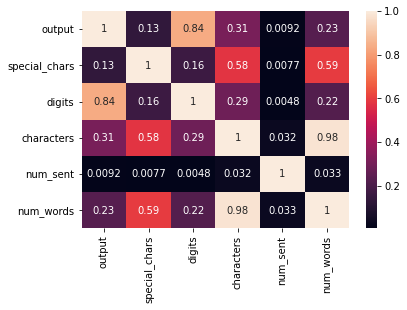

In [39]:
sns.heatmap(new_df.corr(),annot=True)

In [40]:
# FOR output --> digits,special_characters,characters

# DATA PREPROCESSING


In [41]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import string

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    
    for i in text:
        if i not in stopwords and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [43]:
transform_text(new_df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [44]:
new_df['transformed_text'] = new_df['text'].apply(transform_text)

In [45]:
new_df.head()

,output,text,special_chars,digits,characters,num_sent,num_words,transformed_text
0,0,Go until jurong point crazy Available only in ...,9,0,102,1,20,go jurong point crazi avail bugi n great world...
1,0,Ok lar Joking wif u oni,6,0,23,1,6,ok lar joke wif u oni
2,1,Free entry in a wkly comp to win FA Cup final...,6,25,127,1,29,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor U c already then say,6,0,43,1,11,u dun say earli hor u c alreadi say
4,0,Nah I don't think he goes to usf he lives arou...,2,0,60,1,14,nah think goe usf live around though


### WORDCLOUD

In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

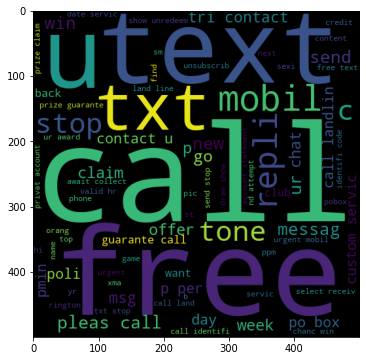

In [47]:
#wordcloud for spam 
spam_wc = wc.generate(new_df[new_df['output'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

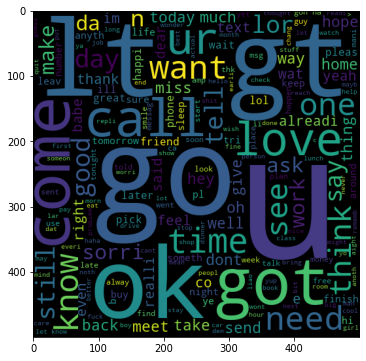

In [48]:
#for ham 
ham_wc = wc.generate(new_df[new_df['output'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
# FINDING WORDS IN SPAM AND PLOTTING 
spam_words = []
for text in new_df[new_df['output'] == 1]['transformed_text'].tolist():
    for word in text.split(' '):
        spam_words.append(word)

C:\Users\DEll\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


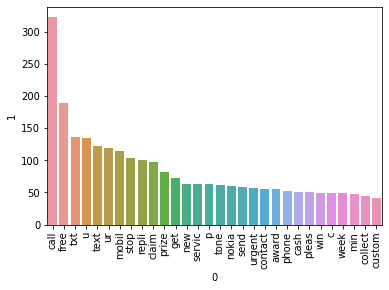

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0],pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# APPLYING TEXT VECTORIZATION

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [52]:
X = cv.fit_transform(new_df['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
X.shape

(5169, 6968)

In [54]:
y = new_df['output'].values

# TRAIN TEST SPLIT

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=2)
X_train.shape

(3101, 6968)

# MAKING ML MODELS

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [59]:
classifiers = {
    'Support Vector Classfiers' : svc,
    'K Nearest Neighbours' : knc, 
    'Multinomial Naive Bayes': mnb,
    'Gaussian Naive Bayes':gnb,
    'Binomial Naive Bayes':bnb,
    'Decision Trees': dtc, 
    'Logistic Regression': lrc
}

In [63]:
def train_classifier(model,X_train,y_train,X_test,y_test):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    confusion_mat = confusion_matrix(y_test,y_pred)
    
    return accuracy,precision,confusion_mat

In [65]:
for name,model in classifiers.items():
    current_accuracy,current_precision,confusion_mat = train_classifier(model, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Confusion Matrix - \n",confusion_mat)
    print("\n\n\n")

For  Support Vector Classfiers
Accuracy -  0.9289168278529981
Precision -  0.7219917012448133
Confusion Matrix - 
 [[1747   67]
 [  80  174]]




For  K Nearest Neighbours
Accuracy -  0.9100580270793037
Precision -  1.0
Confusion Matrix - 
 [[1814    0]
 [ 186   68]]




For  Multinomial Naive Bayes
Accuracy -  0.9608317214700194
Precision -  0.8145454545454546
Confusion Matrix - 
 [[1763   51]
 [  30  224]]




For  Gaussian Naive Bayes
Accuracy -  0.8699226305609284
Precision -  0.4823529411764706
Confusion Matrix - 
 [[1594  220]
 [  49  205]]




For  Binomial Naive Bayes
Accuracy -  0.9656673114119922
Precision -  0.9740932642487047
Confusion Matrix - 
 [[1809    5]
 [  66  188]]




For  Decision Trees
Accuracy -  0.9327852998065764
Precision -  0.9323308270676691
Confusion Matrix - 
 [[1805    9]
 [ 130  124]]




For  Logistic Regression
Accuracy -  0.9700193423597679
Precision -  0.9848484848484849
Confusion Matrix - 
 [[1811    3]
 [  59  195]]




